Real-world scenes follow natural lighting and perspective principles based on physical laws.

Lighting Errors


*   Consistency of Light Direction
*   Shadow and Reflection Accuracy

*   Natural Diffusion of Light






Perspective Errors

*   Vanishing Points
*   Size and Scale of Objects

*   Depth Cues and Foreground-Background Separation






/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


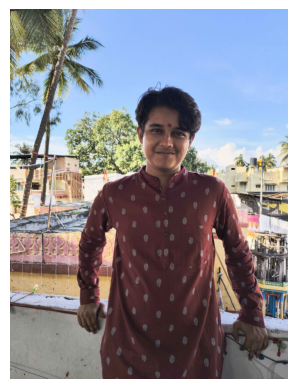

Similarity with 'A scene with consistent lighting': 0.2041
Similarity with 'Objects with clear shadows': 0.1985
Similarity with 'Realistic perspective with depth': 0.1964
Similarity with 'Objects with unusual lighting': 0.1828
Similarity with 'Objects with inconsistent perspective': 0.1966


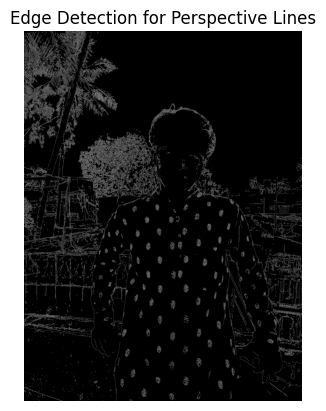

In [1]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Function to load image and preprocess for CLIP
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

# Get CLIP embeddings for image and prompts
def get_clip_embeddings(image, prompts):
    inputs = processor(text=prompts, images=image, return_tensors="pt", padding=True)
    with torch.no_grad():
        image_embeds = model.get_image_features(inputs["pixel_values"])
        text_embeds = model.get_text_features(inputs["input_ids"])
    # Normalize embeddings for cosine similarity
    image_embeds = image_embeds / image_embeds.norm(dim=-1, keepdim=True)
    text_embeds = text_embeds / text_embeds.norm(dim=-1, keepdim=True)
    return image_embeds, text_embeds

# Calculate cosine similarity between image and each text prompt
def calculate_similarity(image_embeds, text_embeds, prompts):
    similarities = torch.matmul(image_embeds, text_embeds.T).squeeze()
    for i, prompt in enumerate(prompts):
        print(f"Similarity with '{prompt}': {similarities[i].item():.4f}")

# Display image and print contextual similarity scores
def analyze_lighting_perspective(image_path, prompts):
    image = load_image(image_path)
    image_embeds, text_embeds = get_clip_embeddings(image, prompts)

    # Display image
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    # Print similarity scores with each prompt
    calculate_similarity(image_embeds, text_embeds, prompts)

# Edge Detection for Perspective Analysis
def edge_detection(image_path):
    # Load the image in grayscale for edge detection
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 100, 200)

    # Display the edge-detected image to visualize perspective lines
    plt.imshow(edges, cmap='gray')
    plt.axis("off")
    plt.title("Edge Detection for Perspective Lines")
    plt.show()

# Define image path and prompts for lighting and perspective analysis
image_path = "/content/real 4.jpg"  # Replace with your image path

prompts = [
    "A scene with consistent lighting",        # Expected lighting
    "Objects with clear shadows",              # Expected shadow consistency
    "Realistic perspective with depth",        # Plausible perspective
    "Objects with unusual lighting",           # Implausible lighting
    "Objects with inconsistent perspective"    # Implausible perspective
]

# Analyze lighting and perspective using CLIP prompts
analyze_lighting_perspective(image_path, prompts)

# Perform edge detection to assess perspective lines
edge_detection(image_path)


0 to 0.1:

*   Indicates very low similarity between the image and the prompt
*   The content of the image likely does not align with the description at all, suggesting an unrelated or opposite concept.

0.1 to 0.2:

*   Indicates weak or minimal similarity.
*   There might be some vague alignment between the image and the prompt, but it is not strong enough to suggest a clear match.

0.2 to 0.3:

*   This range represents a moderate level of similarity, where there is some reasonable alignment between the prompt and the image.
*   A score in this range suggests that the image could partially represent the concept in the prompt, though it’s not definitive.


Above 0.3:

*   In practice, for descriptive prompts related to scene context, scores above 0.3 would indicate a strong similarity, meaning the prompt closely matches the image content.
*   This is less common in general contextual similarity tests but might occur if the image has very distinct characteristics aligning with the prompt.}


